# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev2"><a href="#1.1-Import-Data"><span class="toc-item-num">1.1 &nbsp;&nbsp;</span>Import Data</a></div>
 <div class="lev2"><a href="#1.2-Indexing-Data"><span class="toc-item-num">1.2 &nbsp;&nbsp;</span>Indexing Data</a></div>
 <div class="lev2"><a href="#1.3-Data-cleaning"><span class="toc-item-num">1.3 &nbsp;&nbsp;</span>Data cleaning</a></div>
 <div class="lev2"><a href="#1.4-Calculating-means"><span class="toc-item-num">1.4 &nbsp;&nbsp;</span>Calculating means</a></div>
 <div class="lev2"><a href="#1.5-Merging"><span class="toc-item-num">1.5 &nbsp;&nbsp;</span>Merging</a>
 </p>
 <p>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>
 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num">0.&nbsp;</span>Table of contents</a></div>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [2]:
from datetime import date,time, datetime
import glob, os
from dateutil.parser import parse

In [3]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

For each country:
    1. daily average
        1.1 new cases
            1.1.1 suspected
            1.1.2 probable
            1.1.3 confirmed 
        1.2 deaths

The idea to calculate each mean is to sum the new value for each report over roughly a month and divide the result by the day-span between the first and last report

## 1.1 Import Data
We want to import all the files for each country in a single Dataframe. We did this following a stackoverflow thread that allowed us to easily concatenate the files one by one

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [4]:
EBOLA_FOLDER = DATA_FOLDER + "ebola/"
GUINEA_FOLDER = EBOLA_FOLDER + "guinea_data/"
LIBERIA_FOLDER = EBOLA_FOLDER + "liberia_data/"
SL_FOLDER = EBOLA_FOLDER + "sl_data/"

Solution for following imports found at: https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe/21232849

### Guinea Import

In [5]:
path = GUINEA_FOLDER
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
guinea_data = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
guinea_data.head(2)

,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Date,Description,Dinguiraye,Dubreka,...,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
0,NaN,0,5,NaN,0,NaN,2014-08-04,New cases of suspects,0,0,...,0,NaN,0,NaN,0,0,0,0,5,NaN
1,NaN,0,0,NaN,0,NaN,2014-08-04,New cases of probables,0,0,...,0,NaN,0,NaN,0,0,0,0,0,NaN


### Liberia Import

In [7]:
path = LIBERIA_FOLDER
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
liberia_data = pd.concat(df_from_each_file, ignore_index=True)

In [8]:
liberia_data.head(2)

,Bomi County,Bong County,Date,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County,Unnamed: 18,Variable
0,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Specimens collected
1,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Specimens pending for testing


### SL Import

In [9]:
path = SL_FOLDER # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
sl_data = pd.concat(df_from_each_file, ignore_index=True)

In [10]:
sl_data.head(2)

,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),...,Port Loko,Pujehun,Tonkolili,Unnamed: 18,Western area,Western area combined,Western area rural,Western area urban,date,variable
0,NaN,654142,NaN,494139,168729,NaN,465048,341690,653013,NaN,...,557978,335574,434937,NaN,NaN,NaN,263619,1040888,2014-08-12,population
1,NaN,0,NaN,0,0,NaN,0,0,3,NaN,...,1,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_noncase


## 1.2 Indexing Data

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [11]:
guinea_data_indexed = guinea_data.set_index(['Description', 'Date'])
guinea_data_indexed.head(3)

,,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Dinguiraye,Dubreka,Forecariah,Gueckedou,...,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
Description,Date,,,,,,,,,,,,,,,,,,,,,
New cases of suspects,2014-08-04,NaN,0,5,NaN,0,NaN,0,0,NaN,0,...,0,NaN,0,NaN,0,0,0,0,5,NaN
New cases of probables,2014-08-04,NaN,0,0,NaN,0,NaN,0,0,NaN,0,...,0,NaN,0,NaN,0,0,0,0,0,NaN
New cases of confirmed,2014-08-04,NaN,0,1,NaN,0,NaN,0,0,NaN,3,...,0,NaN,0,NaN,0,0,0,0,4,NaN


In [12]:
liberia_data['Date'] = pd.to_datetime(liberia_data['Date'])
#liberia_data.Date.apply(lambda d: datetime.strptime(d, '%m/%d/%y'))
liberia_data_indexed = liberia_data.set_index(['Variable', 'Date'])
liberia_data_indexed.head(3)

,,Bomi County,Bong County,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County,Unnamed: 18
Variable,Date,,,,,,,,,,,,,,,,,
Specimens collected,2014-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
Specimens pending for testing,2014-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Total specimens tested,2014-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,7.0,28.0,NaN,NaN,NaN,NaN,NaN


In [13]:
sl_data['date'] = pd.to_datetime(sl_data['date'])
sl_data_indexed = sl_data.set_index(['variable', 'date'])
sl_data_indexed.head(3)

,,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),...,Police training School,Police traning School,Port Loko,Pujehun,Tonkolili,Unnamed: 18,Western area,Western area combined,Western area rural,Western area urban
variable,date,,,,,,,,,,,,,,,,,,,,,
population,2014-08-12,NaN,654142,NaN,494139,168729,NaN,465048,341690,653013,NaN,...,NaN,NaN,557978,335574,434937,NaN,NaN,NaN,263619,1040888
new_noncase,2014-08-12,NaN,0,NaN,0,0,NaN,0,0,3,NaN,...,NaN,NaN,1,0,0,NaN,NaN,NaN,0,0
new_suspected,2014-08-12,NaN,1,NaN,0,0,NaN,0,0,9,NaN,...,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0


We observe a lot of NaN values and two duplicated columns in the Sierra Leone Data. This is the next step, cleaning

## 1.3 Data cleaning

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

First idea: it seems to make sense to replace NaN values by 0's. Then we can proceed easily to merging columns

In [14]:
guinea_data_indexed = guinea_data_indexed.apply(pd.to_numeric, errors = 'coerce')
guinea_data_indexed.fillna(0, inplace=True)
guinea_data_indexed.head(3)

,,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Dinguiraye,Dubreka,Forecariah,Gueckedou,...,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
Description,Date,,,,,,,,,,,,,,,,,,,,,
New cases of suspects,2014-08-04,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
New cases of probables,2014-08-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New cases of confirmed,2014-08-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [15]:
liberia_data_indexed = liberia_data_indexed.apply(pd.to_numeric, errors = 'coerce')
liberia_data_indexed.fillna(0, inplace=True)
liberia_data_indexed.head(3)

,,Bomi County,Bong County,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County,Unnamed: 18
Variable,Date,,,,,,,,,,,,,,,,,
Specimens collected,2014-06-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Specimens pending for testing,2014-06-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total specimens tested,2014-06-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,7.0,28.0,0.0,0.0,0.0,0.0,0.0


In [16]:
sl_data_indexed = sl_data_indexed.apply(pd.to_numeric, errors = 'coerce')
sl_data_indexed.fillna(0, inplace=True)
sl_data_indexed.head(3)

,,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),...,Police training School,Police traning School,Port Loko,Pujehun,Tonkolili,Unnamed: 18,Western area,Western area combined,Western area rural,Western area urban
variable,date,,,,,,,,,,,,,,,,,,,,,
population,2014-08-12,0.0,654142.0,0.0,494139.0,168729.0,0.0,465048.0,341690.0,653013.0,0.0,...,0.0,0.0,557978.0,335574.0,434937.0,0.0,0.0,0.0,263619.0,1040888.0
new_noncase,2014-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
new_suspected,2014-08-12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now proceed to the merging of duplicated columns

In [17]:
sl_merged = sl_data_indexed.copy()
sl_merged['Police training School'] = pd.concat([sl_data_indexed['Police training School'] +
                                                       sl_data_indexed['Police traning School']])
del sl_merged['Police traning School']
sl_merged['Western area'] = pd.concat([sl_data_indexed['Western area'] +
                                                       sl_data_indexed['Western area combined']])
del sl_merged['Western area combined']
sl_merged.head(3)

,,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),...,Moyamba,National,Police training School,Port Loko,Pujehun,Tonkolili,Unnamed: 18,Western area,Western area rural,Western area urban
variable,date,,,,,,,,,,,,,,,,,,,,,
population,2014-08-12,0.0,654142.0,0.0,494139.0,168729.0,0.0,465048.0,341690.0,653013.0,0.0,...,278119.0,6348350.0,0.0,557978.0,335574.0,434937.0,0.0,0.0,263619.0,1040888.0
new_noncase,2014-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
new_suspected,2014-08-12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.4 Calculating means

### Guinea Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [18]:
guinea_means = guinea_data_indexed['Totals']
guinea_means

Description                                      Date      
New cases of suspects                            2014-08-04        5.0
New cases of probables                           2014-08-04        0.0
New cases of confirmed                           2014-08-04        4.0
Total new cases registered so far                2014-08-04        9.0
Total cases of suspects                          2014-08-04       11.0
Total cases of probables                         2014-08-04      133.0
Total cases of confirmed                         2014-08-04      351.0
Cumulative (confirmed + probable + suspects)     2014-08-04      495.0
New deaths registered today                      2014-08-04        2.0
New deaths registered today (confirmed)          2014-08-04        2.0
New deaths registered today (probables)          2014-08-04        0.0
New deaths registered today (suspects)           2014-08-04        0.0
Total deaths of suspects                         2014-08-04        2.0
Total deaths of p

In [19]:
guinea_means.sort_index(level=['Description','Date'], ascending=[1, 0], inplace=True)
guinea_filtered = guinea_means[['New cases of suspects', 'New cases of probables', 'New cases of confirmed', 
                               'New deaths registered']]
guinea_filtered = pd.DataFrame(guinea_filtered)
guinea_filtered.loc['New deaths registered']

,Totals
Date,
2014-10-01,15.0
2014-09-30,4.0
2014-09-26,5.0
2014-09-24,3.0
2014-09-23,3.0
2014-09-22,3.0
2014-09-21,0.0
2014-09-19,5.0
2014-09-17,3.0


In [20]:
guinea_unstacked = guinea_filtered.unstack()
guinea_unstacked.index = ['New confirmed', 'New probables', 'New suspects', 'Death registered']
guinea_unstacked.fillna(0, inplace = True)
guinea_unstacked = guinea_unstacked['Totals']
guinea_unstacked

Date,2014-08-04,2014-08-26,2014-08-27,2014-08-30,2014-08-31,2014-09-02,2014-09-04,2014-09-07,2014-09-08,2014-09-09,...,2014-09-16,2014-09-17,2014-09-19,2014-09-21,2014-09-22,2014-09-23,2014-09-24,2014-09-26,2014-09-30,2014-10-01
New confirmed,4.0,10.0,10.0,9.0,29.0,14.0,17.0,11.0,11.0,7.0,...,6.0,6.0,12.0,17.0,14.0,25.0,20.0,10.0,11.0,6.0
New probables,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
New suspects,5.0,18.0,12.0,15.0,9.0,11.0,13.0,5.0,5.0,9.0,...,4.0,4.0,3.0,1.0,5.0,4.0,8.0,2.0,4.0,28.0
Death registered,0.0,5.0,2.0,5.0,3.0,5.0,5.0,4.0,4.0,7.0,...,3.0,3.0,5.0,0.0,3.0,3.0,3.0,5.0,4.0,15.0


#### August Guinea Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [21]:
first_august_gui = '2014-08-04'
last_august_gui = '2014-09-04'
guinea_start_august = guinea_unstacked[[first_august_gui]]
guinea_end_august = guinea_unstacked[[last_august_gui]]

In [22]:
august_month_gui = guinea_unstacked.loc[:,first_august_gui:last_august_gui] 
august_start = parse(guinea_start_august.columns[0])
august_end = parse(guinea_end_august.columns[0])

august_month_gui

Date,2014-08-04,2014-08-26,2014-08-27,2014-08-30,2014-08-31,2014-09-02,2014-09-04
New confirmed,4.0,10.0,10.0,9.0,29.0,14.0,17.0
New probables,0.0,0.0,0.0,0.0,8.0,0.0,0.0
New suspects,5.0,18.0,12.0,15.0,9.0,11.0,13.0
Death registered,0.0,5.0,2.0,5.0,3.0,5.0,5.0


In [23]:
august_days = august_end - august_start
august_days = august_days.days

In [24]:
guinea_august_means = august_month_gui.sum(axis = 1)/august_days
guinea_august_means

New confirmed       3.000000
New probables       0.258065
New suspects        2.677419
Death registered    0.806452
dtype: float64

#### September Guinea Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [25]:
first_sept_gui = '2014-09-02'
last_sept_gui = '2014-10-01'
guinea_start_sept = guinea_unstacked[[first_sept_gui]]
guinea_end_sept = guinea_unstacked[[last_sept_gui]]

In [26]:
sept_month_gui = guinea_unstacked.loc[:,first_sept_gui:last_sept_gui] 
sept_start_gui = parse(guinea_start_sept.columns[0])
sept_end_gui = parse(guinea_end_sept.columns[0])

sept_month_gui

Date,2014-09-02,2014-09-04,2014-09-07,2014-09-08,2014-09-09,2014-09-11,2014-09-14,2014-09-16,2014-09-17,2014-09-19,2014-09-21,2014-09-22,2014-09-23,2014-09-24,2014-09-26,2014-09-30,2014-10-01
New confirmed,14.0,17.0,11.0,11.0,7.0,13.0,14.0,6.0,6.0,12.0,17.0,14.0,25.0,20.0,10.0,11.0,6.0
New probables,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
New suspects,11.0,13.0,5.0,5.0,9.0,9.0,0.0,4.0,4.0,3.0,1.0,5.0,4.0,8.0,2.0,4.0,28.0
Death registered,5.0,5.0,4.0,4.0,7.0,2.0,1.0,3.0,3.0,5.0,0.0,3.0,3.0,3.0,5.0,4.0,15.0


In [27]:
sept_days_gui = sept_end_gui - sept_start_gui
sept_days_gui = sept_days_gui.days

In [28]:
guinea_sept_means = sept_month_gui.sum(axis = 1)/sept_days_gui
guinea_sept_means

New confirmed       7.379310
New probables       0.655172
New suspects        3.965517
Death registered    2.482759
dtype: float64

### Liberia Means

In [29]:
liberia_means = liberia_data_indexed['National']
#liberia_means = pd.DataFrame(liberia_means)
liberia_means.head(2)

Variable                       Date      
Specimens collected            2014-06-16    1.0
Specimens pending for testing  2014-06-16    0.0
Name: National, dtype: float64

In [30]:
liberia_means.sort_index(level=['Variable', 'Date'], ascending=[1, 1], inplace=True)
liberia_filtered = liberia_means[['New Case/s (Suspected)', 'New Case/s (Probable)', 'New case/s (confirmed)', 
                               'Newly reported deaths']]
liberia_filtered.head(3)

Variable               Date      
New Case/s (Probable)  2014-06-16    1.0
                       2014-06-17    0.0
                       2014-06-22    0.0
Name: National, dtype: float64

In [31]:
liberia_filtered = pd.DataFrame(liberia_filtered)
liberia_unstacked = liberia_filtered.unstack()
liberia_unstacked.index = ['New probable', 'New suspected', 'New confirmed', 'Death reported']
liberia_unstacked = liberia_unstacked['National']
liberia_unstacked

Date,2014-06-16 00:00:00,2014-06-17 00:00:00,2014-06-22 00:00:00,2014-06-24 00:00:00,2014-06-25 00:00:00,2014-06-28 00:00:00,2014-06-29 00:00:00,2014-07-01 00:00:00,2014-07-02 00:00:00,2014-07-03 00:00:00,...,2014-11-30 00:00:00,2014-12-01 00:00:00,2014-12-02 00:00:00,2014-12-03 00:00:00,2014-12-04 00:00:00,2014-12-05 00:00:00,2014-12-06 00:00:00,2014-12-07 00:00:00,2014-12-08 00:00:00,2014-12-09 00:00:00
New probable,1.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,3.0,2.0,...,0.0,9.0,10.0,0.0,1800.0,1808.0,1810.0,1829.0,1805.0,1801.0
New suspected,2.0,2.0,5.0,2.0,4.0,2.0,0.0,2.0,1.0,1.0,...,0.0,25.0,18.0,0.0,3054.0,3056.0,3056.0,3067.0,3054.0,3050.0
New confirmed,1.0,0.0,5.0,4.0,2.0,1.0,2.0,2.0,0.0,1.0,...,10.0,1.0,9.0,0.0,2867.0,2867.0,2869.0,2869.0,2927.0,2946.0
Death reported,2.0,0.0,4.0,4.0,3.0,1.0,0.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### June Liberia Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [32]:
first_june_lib = date(2014, 6, 16)
last_june_lib = date(2014, 7, 17)
lib_start_june = liberia_unstacked[[first_june_lib]]
lib_end_june = liberia_unstacked[[last_june_lib]]

In [33]:
june_month_lib = liberia_unstacked.loc[:,first_june_lib:last_june_lib] 
june_start_lib = lib_start_june.columns[0]
june_end_lib = lib_end_june.columns[0]

june_month_lib

Date,2014-06-16 00:00:00,2014-06-17 00:00:00,2014-06-22 00:00:00,2014-06-24 00:00:00,2014-06-25 00:00:00,2014-06-28 00:00:00,2014-06-29 00:00:00,2014-07-01 00:00:00,2014-07-02 00:00:00,2014-07-03 00:00:00,2014-07-07 00:00:00,2014-07-08 00:00:00,2014-07-10 00:00:00,2014-07-13 00:00:00,2014-07-17 00:00:00
New probable,1.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,3.0,2.0,2.0,0.0,1.0,5.0,9.0
New suspected,2.0,2.0,5.0,2.0,4.0,2.0,0.0,2.0,1.0,1.0,0.0,3.0,2.0,0.0,1.0
New confirmed,1.0,0.0,5.0,4.0,2.0,1.0,2.0,2.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0
Death reported,2.0,0.0,4.0,4.0,3.0,1.0,0.0,5.0,5.0,4.0,2.0,2.0,4.0,3.0,3.0


In [34]:
june_days_lib = june_end_lib - june_start_lib
june_days_lib = june_days_lib.days

In [35]:
lib_june_means = june_month_lib.sum(axis = 1)/june_days_lib
lib_june_means

New probable      0.967742
New suspected     0.870968
New confirmed     0.741935
Death reported    1.354839
dtype: float64

#### July Liberia Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [36]:
first_date_lib = date(2014, 7, 1)
last_date_lib = date(2014, 8, 2)
lib_start = liberia_unstacked[[first_date_lib]]
lib_end = liberia_unstacked[[last_date_lib]]

month_lib = liberia_unstacked.loc[:,first_date_lib:last_date_lib] 
month_start_lib = lib_start.columns[0]
month_end_lib = lib_end.columns[0]

days_lib = (month_end_lib - month_start_lib).days

lib_july_means = month_lib.sum(axis = 1)/days_lib
lib_july_means

New probable      1.56250
New suspected     1.09375
New confirmed     0.62500
Death reported    1.87500
dtype: float64

#### August Liberia Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [37]:
first_date_lib = date(2014, 8, 2)
last_date_lib = date(2014, 9, 2)
lib_start = liberia_unstacked[[first_date_lib]]
lib_end = liberia_unstacked[[last_date_lib]]

month_lib = liberia_unstacked.loc[:,first_date_lib:last_date_lib] 
month_start_lib = lib_start.columns[0]
month_end_lib = lib_end.columns[0]

days_lib = (month_end_lib - month_start_lib).days

lib_aug_means = month_lib.sum(axis = 1)/days_lib
lib_aug_means

New probable      8.000000
New suspected     5.483871
New confirmed     2.129032
Death reported    9.354839
dtype: float64

#### September Liberia Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [38]:
first_date_lib = date(2014, 9, 1)
last_date_lib = date(2014, 10, 1)
lib_start = liberia_unstacked[[first_date_lib]]
lib_end = liberia_unstacked[[last_date_lib]]

month_lib = liberia_unstacked.loc[:,first_date_lib:last_date_lib] 
month_start_lib = lib_start.columns[0]
month_end_lib = lib_end.columns[0]

days_lib = (month_end_lib - month_start_lib).days

lib_sep_means = month_lib.sum(axis = 1)/days_lib
lib_sep_means

New probable      23.466667
New suspected     23.466667
New confirmed      4.933333
Death reported    29.566667
dtype: float64

#### October Liberia Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [39]:
first_date_lib = date(2014, 10, 1)
last_date_lib = date(2014, 10, 31)
lib_start = liberia_unstacked[[first_date_lib]]
lib_end = liberia_unstacked[[last_date_lib]]

month_lib = liberia_unstacked.loc[:,first_date_lib:last_date_lib] 
month_start_lib = lib_start.columns[0]
month_end_lib = lib_end.columns[0]

days_lib = (month_end_lib - month_start_lib).days

lib_oct_means = month_lib.sum(axis = 1)/days_lib
lib_oct_means

New probable      14.800000
New suspected     22.033333
New confirmed      1.133333
Death reported    23.366667
dtype: float64

#### November Liberia Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [40]:
first_date_lib = date(2014, 11, 2)
last_date_lib = date(2014, 12, 2)
lib_start = liberia_unstacked[[first_date_lib]]
lib_end = liberia_unstacked[[last_date_lib]]

month_lib = liberia_unstacked.loc[:,first_date_lib:last_date_lib] 
month_start_lib = lib_start.columns[0]
month_end_lib = lib_end.columns[0]

days_lib = (month_end_lib - month_start_lib).days

lib_nov_means = month_lib.sum(axis = 1)/days_lib
lib_nov_means

New probable      4.133333
New suspected     9.866667
New confirmed     1.633333
Death reported    6.733333
dtype: float64

#### December Liberia Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [41]:
liberia_unstacked

Date,2014-06-16 00:00:00,2014-06-17 00:00:00,2014-06-22 00:00:00,2014-06-24 00:00:00,2014-06-25 00:00:00,2014-06-28 00:00:00,2014-06-29 00:00:00,2014-07-01 00:00:00,2014-07-02 00:00:00,2014-07-03 00:00:00,...,2014-11-30 00:00:00,2014-12-01 00:00:00,2014-12-02 00:00:00,2014-12-03 00:00:00,2014-12-04 00:00:00,2014-12-05 00:00:00,2014-12-06 00:00:00,2014-12-07 00:00:00,2014-12-08 00:00:00,2014-12-09 00:00:00
New probable,1.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,3.0,2.0,...,0.0,9.0,10.0,0.0,1800.0,1808.0,1810.0,1829.0,1805.0,1801.0
New suspected,2.0,2.0,5.0,2.0,4.0,2.0,0.0,2.0,1.0,1.0,...,0.0,25.0,18.0,0.0,3054.0,3056.0,3056.0,3067.0,3054.0,3050.0
New confirmed,1.0,0.0,5.0,4.0,2.0,1.0,2.0,2.0,0.0,1.0,...,10.0,1.0,9.0,0.0,2867.0,2867.0,2869.0,2869.0,2927.0,2946.0
Death reported,2.0,0.0,4.0,4.0,3.0,1.0,0.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#impossiburu: dicembru suk

### Sierra Leone Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [43]:
sl_means = sl_data_indexed['National']
sl_means.head(2)

variable     date      
population   2014-08-12    6348350.0
new_noncase  2014-08-12          4.0
Name: National, dtype: float64

In [44]:
sl_means.sort_index(level=['variable','date'], ascending=[1, 1], inplace=True)
sl_filtered = sl_means[['new_noncase', 'new_suspected', 'new_probable', 'new_confirmed', 
                               'death_suspected', 'death_probable', 'death_confirmed']]
sl_filtered.head()

variable         date      
death_confirmed  2014-08-12    264.0
                 2014-08-13    273.0
                 2014-08-14    280.0
                 2014-08-15    287.0
                 2014-08-16    297.0
Name: National, dtype: float64

In [45]:
sl_filtered = pd.DataFrame(sl_filtered)
sl_unstacked  = sl_filtered.unstack()

In [46]:
sl_unstacked.reindex(['new_noncase', 'new_suspected', 'new_probable', 'new_confirmed', 
                               'death_suspected', 'death_probable', 'death_confirmed'])
sl_unstacked.index = ['Death confirmed', 'Death probable', 'Death suspected', 
                      'New confirmed', 'New noncase', 'New probable', 'New suspected'  
                     ]
sl_unstacked = sl_unstacked['National']
sl_unstacked.head(2)

date,2014-08-12 00:00:00,2014-08-13 00:00:00,2014-08-14 00:00:00,2014-08-15 00:00:00,2014-08-16 00:00:00,2014-08-17 00:00:00,2014-08-18 00:00:00,2014-08-19 00:00:00,2014-08-20 00:00:00,2014-08-21 00:00:00,...,2014-11-22 00:00:00,2014-11-23 00:00:00,2014-11-24 00:00:00,2014-11-28 00:00:00,2014-11-29 00:00:00,2014-12-01 00:00:00,2014-12-04 00:00:00,2014-12-05 00:00:00,2014-12-06 00:00:00,2014-12-13 00:00:00
Death confirmed,264.0,273.0,280.0,287.0,297.0,305.0,312.0,320.0,322.0,329.0,...,1333.0,1364.0,1397.0,1481.0,1496.0,1549.0,1648.0,1669.0,1708.0,0.0
Death probable,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,0.0


#### Augusut Sierra Leone Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [47]:
first_date_sl = date(2014, 8, 12)
last_date_sl = date(2014, 8, 31)
date_death_mean = date(2014, 8, 12)
sl_start = sl_unstacked[[first_date_sl]]
sl_end = sl_unstacked[[last_date_sl]]

month_sl = sl_unstacked.loc[:,first_date_sl:last_date_sl] 
month_start_sl = sl_start.columns[0]
month_end_sl = sl_end.columns[0]

days_sl = (month_end_sl - month_start_sl).days
death_c = (month_sl.loc['Death confirmed', last_date_sl] - month_sl.loc['Death confirmed', first_date_sl])/days_sl
sl_aug_means = month_sl.sum(axis = 1)/days_sl
sl_aug_means['Death confirmed'] = death_c
sl_aug_means

Death confirmed     6.473684
Death probable     33.315789
Death suspected     6.789474
New confirmed      19.526316
New noncase        10.210526
New probable        1.210526
New suspected       5.736842
dtype: float64

#### September Sierra Leone Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [48]:
first_date_sl = date(2014, 9, 1)
last_date_sl = date(2014, 9, 30)
date_death_mean = date(2014, 8, 15)
sl_start = sl_unstacked[[first_date_sl]]
sl_end = sl_unstacked[[last_date_sl]]

month_sl = sl_unstacked.loc[:,first_date_sl:last_date_sl] 
month_start_sl = sl_start.columns[0]
month_end_sl = sl_end.columns[0]

days_sl = (month_end_sl - month_start_sl).days
death_c = (month_sl.loc['Death confirmed', last_date_sl] - month_sl.loc['Death confirmed', first_date_sl])/days_sl
sl_sep_means = month_sl.sum(axis = 1)/days_sl
sl_sep_means['Death confirmed'] = death_c
sl_sep_means

Death confirmed     5.310345
Death probable     34.448276
Death suspected    10.241379
New confirmed      34.413793
New noncase        27.241379
New probable        0.000000
New suspected       6.275862
dtype: float64

#### October Sierra Leone Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [49]:
first_date_sl = date(2014, 10, 1)
last_date_sl = date(2014, 10, 31)
date_death_mean = date(2014, 9, 15)
sl_start = sl_unstacked[[first_date_sl]]
sl_end = sl_unstacked[[last_date_sl]]

month_sl = sl_unstacked.loc[:,first_date_sl:last_date_sl] 
month_start_sl = sl_start.columns[0]
month_end_sl = sl_end.columns[0]

days_sl = (month_end_sl - month_start_sl).days
death_c = (month_sl.loc['Death confirmed', last_date_sl] - month_sl.loc['Death confirmed', first_date_sl])/days_sl
sl_oct_means = month_sl.sum(axis = 1)/days_sl
sl_oct_means['Death confirmed'] = death_c
sl_oct_means['Death probable'] = (sl_oct_means['Death probable'] - sl_unstacked.loc['Death probable', date_death_mean])/days_sl
sl_oct_means['Death suspected'] = (sl_oct_means['Death suspected'] - 
                                   sl_unstacked.loc['Death suspected', date_death_mean])/days_sl
sl_oct_means

Death confirmed    17.933333
Death probable      3.728889
Death suspected     2.663333
New confirmed      52.933333
New noncase        49.733333
New probable        0.800000
New suspected      12.466667
dtype: float64

#### November Sierra Leone Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [50]:
first_date_sl = date(2014, 11, 1)
last_date_sl = date(2014, 11, 29)
date_death_mean = date(2014, 10, 4)
sl_start = sl_unstacked[[first_date_sl]]
sl_end = sl_unstacked[[last_date_sl]]

month_sl = sl_unstacked.loc[:,first_date_sl:last_date_sl] 
month_start_sl = sl_start.columns[0]
month_end_sl = sl_end.columns[0]

days_sl = (month_end_sl - month_start_sl).days
death_c = (month_sl.loc['Death confirmed', last_date_sl] - month_sl.loc['Death confirmed', first_date_sl])/days_sl
sl_nov_means = month_sl.sum(axis = 1)/days_sl
sl_nov_means['Death confirmed'] = death_c
sl_nov_means['Death probable'] = (sl_nov_means['Death probable'] - sl_unstacked.loc['Death probable', date_death_mean])/days_sl
sl_nov_means['Death suspected'] = (sl_nov_means['Death suspected'] - 
                                   sl_unstacked.loc['Death suspected', date_death_mean])/days_sl
sl_nov_means

Death confirmed    14.964286
Death probable      0.647959
Death suspected     2.742347
New confirmed      44.928571
New noncase        60.678571
New probable        0.000000
New suspected      11.500000
dtype: float64

#### December Sierra Leone Means

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [51]:
first_date_sl = date(2014, 12, 1)
last_date_sl = date(2014, 12, 6)
date_death_mean = date(2014, 10, 10)
sl_start = sl_unstacked[[first_date_sl]]
sl_end = sl_unstacked[[last_date_sl]]

month_sl = sl_unstacked.loc[:,first_date_sl:last_date_sl] 
month_start_sl = sl_start.columns[0]
month_end_sl = sl_end.columns[0]

days_sl = (month_end_sl - month_start_sl).days
death_c = (month_sl.loc['Death confirmed', last_date_sl] - month_sl.loc['Death confirmed', first_date_sl])/days_sl
sl_dec_means = month_sl.sum(axis = 1)/days_sl
sl_dec_means['Death confirmed'] = death_c
sl_dec_means['Death probable'] = (sl_dec_means['Death probable'] - sl_unstacked.loc['Death probable', date_death_mean])/days_sl
sl_dec_means['Death suspected'] = (sl_dec_means['Death suspected'] - 
                                   sl_unstacked.loc['Death suspected', date_death_mean])/days_sl
sl_dec_means

Death confirmed    31.80
Death probable      2.28
Death suspected     5.88
New confirmed      32.60
New noncase        94.80
New probable        0.00
New suspected       8.40
dtype: float64

## 1.5 Merging

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

This par consists of combining the different results in a single Dataframe

#### Guinea Merge

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [52]:
guinea_august_means = pd.DataFrame(guinea_august_means)
guinea_august_means.columns = ['Aug']
guinea_august_means

,Aug
New confirmed,3.000000
New probables,0.258065
New suspects,2.677419
Death registered,0.806452


In [53]:
guinea_sept_means = pd.DataFrame(guinea_sept_means)
guinea_sept_means.columns = ['Sep']
guinea_sept_means

,Sep
New confirmed,7.379310
New probables,0.655172
New suspects,3.965517
Death registered,2.482759


In [54]:
guinea_merged = pd.concat([guinea_august_means, guinea_sept_means], axis=1)
guinea_merged

,Aug,Sep
New confirmed,3.000000,7.379310
New probables,0.258065,0.655172
New suspects,2.677419,3.965517
Death registered,0.806452,2.482759


#### Liberia Merge

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [55]:
lib_june_means = pd.DataFrame(lib_june_means)
lib_june_means.columns = ['Jun']

lib_july_means = pd.DataFrame(lib_july_means)
lib_july_means.columns = ['Jul']

lib_aug_means = pd.DataFrame(lib_aug_means)
lib_aug_means.columns = ['Aug']

lib_sep_means = pd.DataFrame(lib_sep_means)
lib_sep_means.columns = ['Sep']

lib_oct_means = pd.DataFrame(lib_oct_means)
lib_oct_means.columns = ['Oct']

lib_nov_means = pd.DataFrame(lib_nov_means)
lib_nov_means.columns = ['Nov']

In [56]:
lib_merged = pd.concat([lib_june_means, lib_july_means, lib_aug_means, lib_sep_means, lib_oct_means, lib_nov_means], axis=1)
lib_merged

,Jun,Jul,Aug,Sep,Oct,Nov
New probable,0.967742,1.56250,8.000000,23.466667,14.800000,4.133333
New suspected,0.870968,1.09375,5.483871,23.466667,22.033333,9.866667
New confirmed,0.741935,0.62500,2.129032,4.933333,1.133333,1.633333
Death reported,1.354839,1.87500,9.354839,29.566667,23.366667,6.733333


#### Sierra Leone Merge

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [57]:
sl_aug_means = pd.DataFrame(sl_aug_means)
sl_aug_means.columns = ['Aug']

sl_sep_means = pd.DataFrame(sl_sep_means)
sl_sep_means.columns = ['Sep']

sl_oct_means = pd.DataFrame(sl_oct_means)
sl_oct_means.columns = ['Oct']

sl_nov_means = pd.DataFrame(sl_nov_means)
sl_nov_means.columns = ['Nov']

sl_dec_means = pd.DataFrame(sl_dec_means)
sl_dec_means.columns = ['Dec']

In [58]:
sl_merged = pd.concat([sl_aug_means, sl_sep_means,  sl_oct_means, sl_nov_means, sl_dec_means], axis=1)
sl_merged

,Aug,Sep,Oct,Nov,Dec
Death confirmed,6.473684,5.310345,17.933333,14.964286,31.80
Death probable,33.315789,34.448276,3.728889,0.647959,2.28
Death suspected,6.789474,10.241379,2.663333,2.742347,5.88
New confirmed,19.526316,34.413793,52.933333,44.928571,32.60
New noncase,10.210526,27.241379,49.733333,60.678571,94.80
New probable,1.210526,0.000000,0.800000,0.000000,0.00
New suspected,5.736842,6.275862,12.466667,11.500000,8.40


#### Countries Merge

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [59]:
merged = pd.concat([guinea_merged, lib_merged, sl_merged], keys = ['Guinea', 'Liberia', 'Sierra Leone']).fillna(0).round(1)
merged = merged.reindex_axis(['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], axis = 1)
merged.index.names = ['Country', None]
merged

Jun  Jul   Aug   Sep   Oct   Nov   Dec
Country                                                              
Guinea       New confirmed     0.0  0.0   3.0   7.4   0.0   0.0   0.0
             New probables     0.0  0.0   0.3   0.7   0.0   0.0   0.0
             New suspects      0.0  0.0   2.7   4.0   0.0   0.0   0.0
             Death registered  0.0  0.0   0.8   2.5   0.0   0.0   0.0
Liberia      New probable      1.0  1.6   8.0  23.5  14.8   4.1   0.0
             New suspected     0.9  1.1   5.5  23.5  22.0   9.9   0.0
             New confirmed     0.7  0.6   2.1   4.9   1.1   1.6   0.0
             Death reported    1.4  1.9   9.4  29.6  23.4   6.7   0.0
Sierra Leone Death confirmed   0.0  0.0   6.5   5.3  17.9  15.0  31.8
             Death probable    0.0  0.0  33.3  34.4   3.7   0.6   2.3
             Death suspected   0.0  0.0   6.8  10.2   2.7   2.7   5.9
             New confirmed     0.0  0.0  19.5  34.4  52.9  44.9  32.6
             New noncase       0.0  0.0  10.2  27.2  49.7  60.7  94.8
             New probable      0.0  0.0   1.2   0.0   0.8   0.0   0.0
             New suspected     0.0  0.0   5.7   6.3  12.5  11.5   8.4

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [60]:
# Write your answer here

    
path ='Data/microbiome'
microbiome = pd.DataFrame()
new_index = pd.DataFrame()

for idx in range(1,10):
    data_mid = pd.read_excel(path + '/MID' + str(idx) + '.xls', 'Sheet 1', index_col=None, header=None)
    
    new_index_temp = ['MID'+ str(idx)]* len(data_mid);
    
    index_mid = pd.DataFrame({'Index' : new_index_temp}, index = range(0,len(data_mid)));
    index_mid = data_mid.join(index_mid)
    
    microbiome = microbiome.append(index_mid)

    
microbiome.columns = ['Name','Result', 'Index']
microbiome

,Name,Result,Index
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID1
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1
6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1
8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1


In [61]:
metadata = pd.read_excel(path + '/metadata.xls', index_col=None, header=None)
metadata.columns = ['Index','Group', 'Sample']


microbiome_final = pd.merge(microbiome, metadata,on=('Index'), how='left', indicator=False,)
microbiome_final = microbiome_final.set_index(['Index','Name']).fillna('unknown');
microbiome_final.head()

Result  \
Index Name                                                         
MID1  Archaea "Crenarchaeota" Thermoprotei Desulfuroc...       7   
      Archaea "Crenarchaeota" Thermoprotei Desulfuroc...       2   
      Archaea "Crenarchaeota" Thermoprotei Sulfolobal...       3   
      Archaea "Crenarchaeota" Thermoprotei Thermoprot...       3   
      Archaea "Euryarchaeota" "Methanomicrobia" Metha...       7   

                                                                       Group  \
Index Name                                                                     
MID1  Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  EXTRACTION CONTROL   
      Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  EXTRACTION CONTROL   
      Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  EXTRACTION CONTROL   
      Archaea "Crenarchaeota" Thermoprotei Thermoprot...  EXTRACTION CONTROL   
      Archaea "Euryarchaeota" "Methanomicrobia" Metha...  EXTRACTION CONTROL   

                                                           Sample  
Index Name                                                         
MID1  Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown  
      Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown  
      Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  unknown  
      Archaea "Crenarchaeota" Thermoprotei Thermoprot...  unknown  
      Archaea "Euryarchaeota" "Methanomicrobia" Metha...  unknown

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [65]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [177]:
titanic_data = pd.read_excel('Data/titanic.xls', sheetname='titanic', header=0)
titanic_data[['boat']] = titanic_data[['boat']].fillna(-1)
titanic_data[['body']] = titanic_data[['body']].fillna(-1)
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,-1.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,-1.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,-1,-1.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,-1,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,-1,-1.0,"Montreal, PQ / Chesterville, ON"


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### Task 1: Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Type: value range 

1. pclass: {1; 2; 3}
2. survived: {0; 1}
3. name: name
4. sex: {male; female}
5. age: age
6. sibsp: number of siblings/spouse aboard
7. parch: number of parent/children aboard
8. ticket: ticket number
9. fare: fare
10. cabin:
11. embarked:
12. boat: escape boat number
13. body: corpse number
14. home.dest: 

Categorisables: pclass, survived, sex, sibsp, parch, fare

### Task 2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [78]:
nbr_first_class = len(titanic_data[(titanic_data['pclass']==1)])
nbr_first_class

323

In [81]:
nbr_second_class = len(titanic_data[(titanic_data['pclass']==2)])
nbr_second_class

277

In [83]:
nbr_third_class = len(titanic_data[(titanic_data['pclass']==3)])
nbr_third_class

709

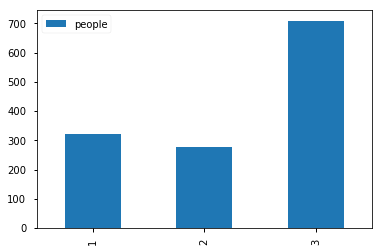

In [238]:
pclass_frame = pd.DataFrame([nbr_first_class, nbr_second_class, nbr_third_class], index= [1,2,3])
pclass_frame.columns = ['people']
pclass_frame.plot(kind='bar')

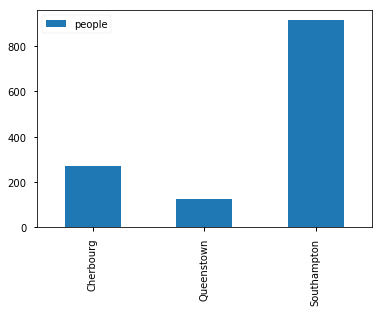

In [236]:
emb_c = len(titanic_data[(titanic_data['embarked']=='C')])
emb_q = len(titanic_data[(titanic_data['embarked']=='Q')])
emb_s = len(titanic_data[(titanic_data['embarked']=='S')])

emb_frame = pd.DataFrame([emb_c, emb_q, emb_s], index= ['Cherbourg', 'Queenstown', 'Southampton'])
emb_frame.columns = ['people']
emb_frame.plot(kind='bar')

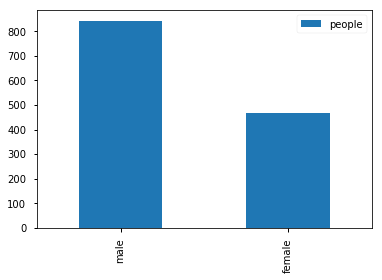

In [235]:
sex_m = len(titanic_data[(titanic_data['sex']=='male')])
sex_f = len(titanic_data[(titanic_data['sex']=='female')])

sex_frame = pd.DataFrame([sex_m, sex_f], index= ['male', 'female'])
sex_frame.columns = ['people']
sex_frame.plot(kind='bar')

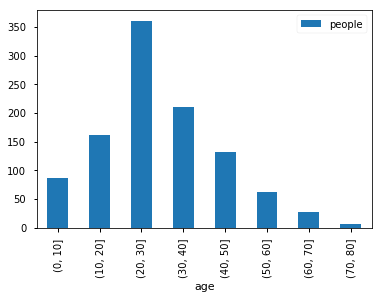

In [239]:
titanic_cpy = titanic_data.copy()
age_cut = pd.cut(titanic_data['age'], [0,10,20,30,40,50,60,70,80,90,100])
ones = pd.DataFrame([1]*len(titanic_cpy))
age_cut_ext = pd.concat([titanic_cpy['age'], ones], axis=1)
age_indexed = age_cut_ext.set_index(['age'])
grouped = age_cut_ext.groupby(pd.cut(age_cut_ext['age'], np.arange(0, 100+10, 10))).sum()
grouped = grouped.drop(['age'],axis=1)
grouped.columns = ['people']
grouped.dropna().plot(kind='bar')

### Taks 3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>